In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [84]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [85]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [86]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [87]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [88]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

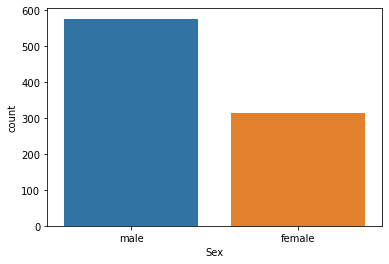

In [89]:
sns.countplot(data['Sex']);

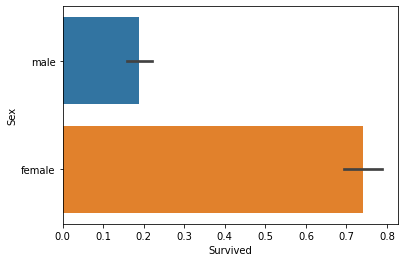

In [90]:
sns.barplot(data['Survived'],data['Sex']);

75% females are survied.

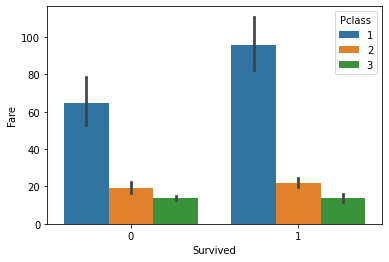

In [91]:
sns.barplot(data['Survived'], data['Fare'], data['Pclass']);

People with higher class have higher chance of survival

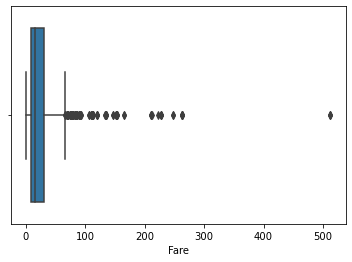

In [92]:
sns.boxplot(x=data["Fare"])
plt.show()

for majority of passengers, Fare price is less than 250.
So, let's only keep the rows with Fare < 250.

In [93]:
data = data[data['Fare'] < 250]
data.shape

(882, 12)

So, we have removed 9 rows.
Originally, there were 891 rows.

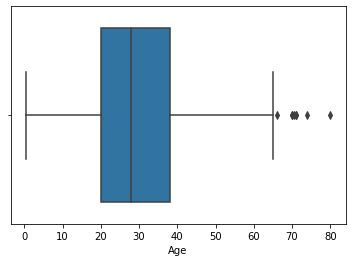

In [94]:
sns.boxplot(x= data["Age"])
plt.show()

We can see there are some outliers in Age, but they are not much far. So, we will keep as of now.

In [95]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

There are 177 NaN values in Age & 686 NaN values in Cabin column.
In Cabin more than 75% values are empty.
So, we will just remove that column.

In [96]:
data.drop("Cabin", axis=1, inplace=True)
data.shape

(882, 11)

In [97]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [98]:
age_mean = data['Age'].mean()
print(age_mean)

29.68818439716312


We can fill all the NaN values using fillna

In [99]:
data['Age'].fillna(age_mean, inplace=True)

In [100]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [101]:
data['Embarked'].value_counts()

S    640
C    163
Q     77
Name: Embarked, dtype: int64

In [102]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now, we can see, no NaN values are there in our whole data.

In [103]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [104]:
data['total_family_members'] = data['Parch'] + data['SibSp'] + 1
data['is_alone'] = data['total_family_members'].apply(lambda x: 0 if x > 1 else 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


<AxesSubplot:xlabel='total_family_members', ylabel='Survived'>

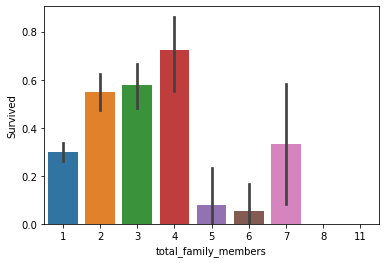

In [105]:
sns.barplot(data['total_family_members'],data['Survived'])

People with total_family_members = 4 have more than 70% chances of survival

<AxesSubplot:xlabel='is_alone', ylabel='Survived'>

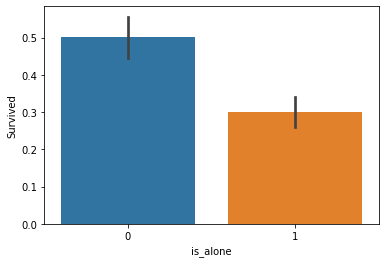

In [106]:
sns.barplot(data['is_alone'],data['Survived'])

People with family have 20% higher chance of survival than people travelling alone

Age column also can be used to create partitions.
We can use apply function to Age column to create new column age_group
Like

In [107]:
def age_to_group(age):
    if 0 < age < 12:

        return 0
    elif 12 <= age < 50:
    
        return 1
    elif age >= 50:
    
        return 2
    
data['age_group'] = data['Age'].apply(age_to_group)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1


*Why this age group is useful let's see

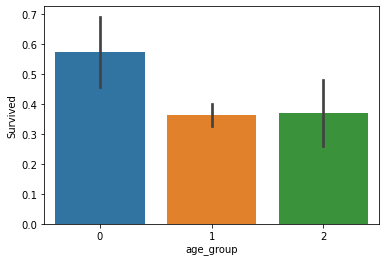

In [108]:
sns.barplot(data['age_group'],data['Survived']);

0 i.e. children have higher survival rate compared to adults & elderly people.
This data may become useful to our model.

In [109]:
data['name_title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1,Mr


In [110]:
data['name_title'].value_counts()

Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: name_title, dtype: int64

In [111]:
def clean_name_title(val):
    if val in ['Rev', 'Col', 'Mlle', 'Mme', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Capt']:
        return 'RARE'
    else:
        return val
data['name_title'] = data['name_title'].apply(clean_name_title)
data['name_title'].value_counts()

Mr        513
Miss      177
Mrs       125
Master     40
RARE       18
Dr          7
Major       2
Name: name_title, dtype: int64

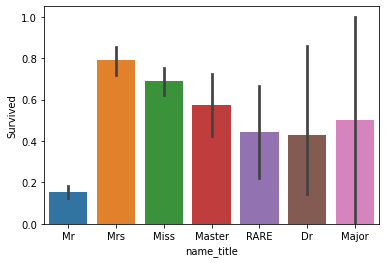

In [112]:
sns.barplot(data['name_title'],data['Survived']);

People with Mrs & Miss titles i.e. females have high chances of survival.
But in males, with Master title, you have higher chances of survival

In [113]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1,Mrs


Let's drop columns which are not useful to us as of now.

In [114]:
target = data['Survived'].tolist()
data.drop(['PassengerId','Survived', 'Name', 'Ticket'], axis=1, inplace=True)

In [115]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,male,22.0,1,0,7.2500,S,2,0,1,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,1,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,1,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,1,Mr


In [117]:
from sklearn import preprocessing

In [118]:
le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['name_title'] = le.fit_transform(data['name_title'])
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,1,22.0,1,0,7.2500,2,2,0,1,4
1,1,0,38.0,1,0,71.2833,0,2,0,1,5
2,3,0,26.0,0,0,7.9250,2,1,1,1,3
3,1,0,35.0,1,0,53.1000,2,2,0,1,5
4,3,1,35.0,0,0,8.0500,2,1,1,1,4


everything in numbers

In [120]:
train_data, val_data, train_target, val_target = train_test_split(data, target, test_size=0.2)
train_data.shape, val_data.shape, len(train_target), len(val_target)

((705, 11), (177, 11), 705, 177)

In [123]:
import random, os

In [124]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed_everything(2020)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
model = LogisticRegression()
model.fit(train_data, train_target)

LogisticRegression()

In [137]:
val_predictions = model.predict(val_data)
len(val_predictions)


177

In [138]:
val_predictions[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy = accuracy_score(val_target, val_predictions)
accuracy

0.8022598870056498

In [143]:
print("We got %.3f percent accuracy on our validation unseen data !!"%(accuracy*100))
print("We are %.3f correct in predicting whether a person will survice in Titanic crash !!"%(accuracy*100))

We got 80.226 percent accuracy on our validation unseen data !!
We are 80.226 correct in predicting whether a person will survice in Titanic crash !!
